In [32]:
import tensorflow as tf

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [34]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [35]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [36]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"],axis=1)

In [37]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [38]:
# Rename the columns 
df.columns = ['labels','data']

In [39]:
# create a binary lables (0 and 1)

df['b_labels']= df['labels'].map({'ham': 0,'spam': 1})
y= df['b_labels'].values

In [40]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [41]:
x_train, x_test,y_train,y_test = train_test_split(df['data'],y,test_size=0.33)

In [42]:
# convert sentences to sequences

max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [43]:
# check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 7265


In [44]:
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor: ',data_train.shape)

Shape of data train tensor:  (3733, 189)


In [45]:
# set the value of T to get sequence length
T = data_train.shape[1]

In [46]:
T

189

In [47]:
# pad the test set
data_test = pad_sequences(sequences_test,maxlen=T)
print('Shape of data test tensor: ',data_test.shape)

Shape of data test tensor:  (1839, 189)


Building Model

In [48]:
D =20

# Input layer
i = Input(shape=(T,))

# Embedding Layer
x = Embedding(V +1,D)(i)

# First CNN Layer
x = Conv1D(32,3,activation='relu')(x)
x = MaxPooling1D(3)(x)

# Second CNN Layer
x = Conv1D(64,3,activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third layer
x = Conv1D(128,3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense Layer
x = Dense(1,activation='sigmoid')(x)
model = Model(i,x)

In [49]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
r = model.fit(x=data_train,y=y_train,epochs=5,validation_data=(data_test,y_test))

Epoch 1/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8681 - loss: 0.4482 - val_accuracy: 0.9271 - val_loss: 0.2224
Epoch 2/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9646 - loss: 0.1181 - val_accuracy: 0.9734 - val_loss: 0.0904
Epoch 3/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9925 - loss: 0.0273 - val_accuracy: 0.9880 - val_loss: 0.0437
Epoch 4/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9988 - loss: 0.0055 - val_accuracy: 0.9886 - val_loss: 0.0514
Epoch 5/5
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9880 - val_loss: 0.0505


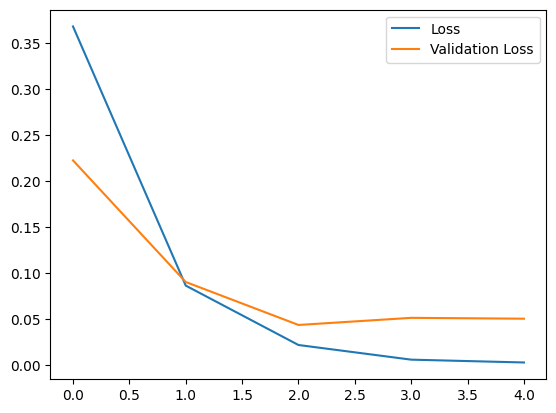

In [52]:
import matplotlib.pyplot as plt 
plt.plot(r.history['loss'],label='Loss')
plt.plot(r.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()


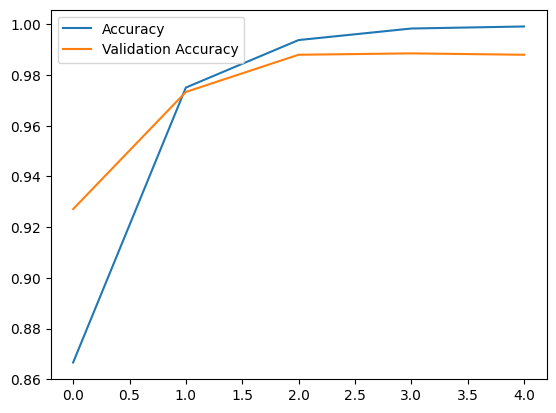

In [53]:
# accuracy per iteration
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()